In [1]:
import pandas as pd
stock_data = pd.read_csv('./NFLX.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,362.260010,362.869995,354.690002,357.320007,357.320007,5526500
2019-03-04,359.720001,362.250000,348.040009,351.040009,351.040009,7487000
2019-03-05,351.459991,356.170013,348.250000,354.299988,354.299988,5937800
2019-03-06,353.600006,359.880005,351.700012,359.609985,359.609985,6211900
2019-03-07,360.160004,362.859985,350.500000,352.600006,352.600006,6151300


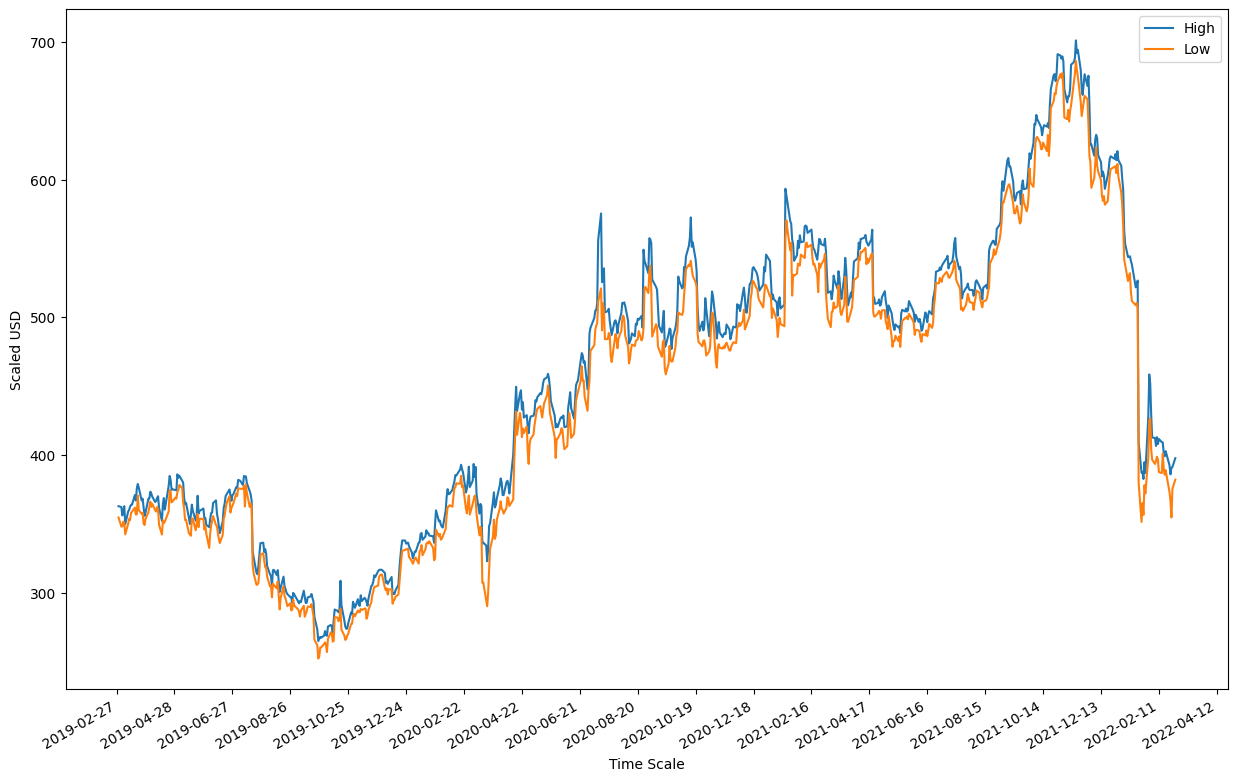

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates. DayLocator (interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn. metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [32]:
target_y = stock_data['Close']
X_feat=stock_data.iloc[:,0:3]
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
stock_data_ft = pd.DataFrame (columns=X_feat.columns,data=X_ft,index=X_feat.index)
def lstm_split(data, n_steps):
  x, y = [], []
  for i in range(len(data)-n_steps+1):
    x.append(data[i:i + n_steps, :-1])
    y.append(data[i + n_steps-1, -1])
  return np.array(x), np.array(y)

In [33]:
X1, y1=lstm_split(stock_data_ft.values, n_steps=2)
train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index=stock_data_ft.index
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index [split_idx:]
print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(755, 2, 2) (604, 2, 2) (151, 2, 2) (151,)


In [46]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation= 'relu', return_sequences=False))
lstm.add(Dense (1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4480      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4513 (17.63 KB)
Trainable params: 4513 (17.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=2, shuffle=False)

Epoch 1/100
151/151 - 1s - loss: 0.2702 - 1s/epoch - 10ms/step
Epoch 2/100
151/151 - 0s - loss: 0.0077 - 277ms/epoch - 2ms/step
Epoch 3/100
151/151 - 0s - loss: 0.0053 - 278ms/epoch - 2ms/step
Epoch 4/100
151/151 - 0s - loss: 0.0050 - 284ms/epoch - 2ms/step
Epoch 5/100
151/151 - 0s - loss: 0.0047 - 387ms/epoch - 3ms/step
Epoch 6/100
151/151 - 0s - loss: 0.0045 - 319ms/epoch - 2ms/step
Epoch 7/100
151/151 - 0s - loss: 0.0045 - 313ms/epoch - 2ms/step
Epoch 8/100
151/151 - 0s - loss: 0.0044 - 326ms/epoch - 2ms/step
Epoch 9/100
151/151 - 0s - loss: 0.0044 - 320ms/epoch - 2ms/step
Epoch 10/100
151/151 - 0s - loss: 0.0044 - 296ms/epoch - 2ms/step
Epoch 11/100
151/151 - 0s - loss: 0.0043 - 310ms/epoch - 2ms/step
Epoch 12/100
151/151 - 0s - loss: 0.0042 - 260ms/epoch - 2ms/step
Epoch 13/100
151/151 - 0s - loss: 0.0041 - 255ms/epoch - 2ms/step
Epoch 14/100
151/151 - 0s - loss: 0.0041 - 276ms/epoch - 2ms/step
Epoch 15/100
151/151 - 0s - loss: 0.0040 - 473ms/epoch - 3ms/step
Epoch 16/100
151/151 

In [48]:
y_pred=lstm.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [51]:

rmse=mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ",rmse)
print("MAPE: ", mape)


RSME:  0.09308478139280423
MAPE:  0.05996277437943307


In [54]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))
lstm.add(Dense (1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 50)             10600     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30851 (120.51 KB)
Trainable params: 30851 (120.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
rmse=mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ",rmse)
print("MAPE: ", mape)

RSME:  0.09308478139280423
MAPE:  0.05996277437943307
